# Oscillating droplet 2D evalutaion

In [1]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["text.usetex"] = True
rcParams["figure.dpi"] = 300 
rcParams["font.size"] = 9
rcParams["axes.titlesize"] = 9
rcParams["axes.labelsize"] = 9

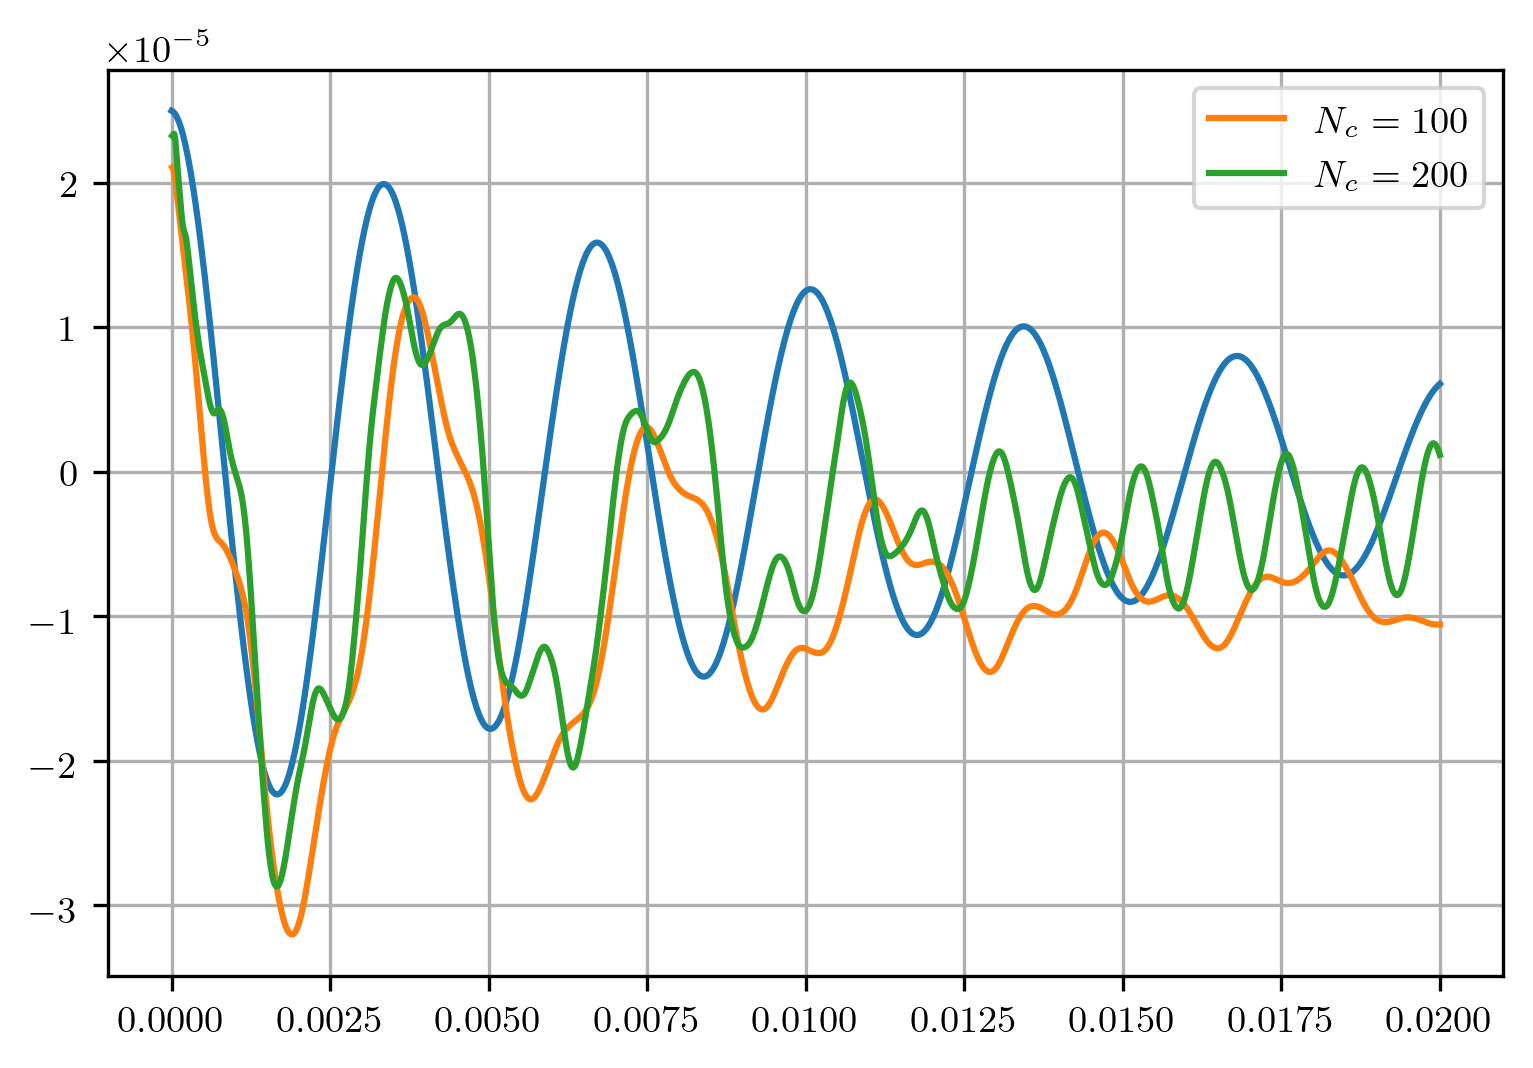

In [2]:
D = 0.001
n = 2
sigma = 0.07275
rhol = 1000.0
rhog = 1.0
r0 = D/2.0
dyn_viscl = 1e-6*rhol
dyn_viscg = 1.48e-5*rhog
omega2 = math.sqrt((n**3 - n)*sigma/((rhol+rhog)*r0**3))
epsilon = 0.05*r0
b = dyn_viscl/dyn_viscg

#time = [t/(0.02/1e5) for t in range(0, int(0.02/1e5))] 
time = numpy.linspace(start=0.0, stop=0.02, num=1000)
decay = [epsilon*math.exp(-b*t)*math.cos(omega2*t) for t in time]

#plt.plot(time, decay)

df = pd.read_json("oscillating-data.json", orient="table")

fig, ax = plt.subplots()

ax.plot(time, decay)
for n_cells, plotdf in df.groupby(level='RESOLUTION'):
    ax.plot(plotdf['Time'], plotdf['heightx']/2-r0,
            label='$N_c = %s$' % n_cells)

ax.legend()
ax.grid()